In [147]:
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
from scipy.stats import norm, uniform, expon,poisson
from scipy.integrate import quad
from sympy.solvers import solve
from sympy import Symbol
import numpy as np
from pandas import Series, DataFrame

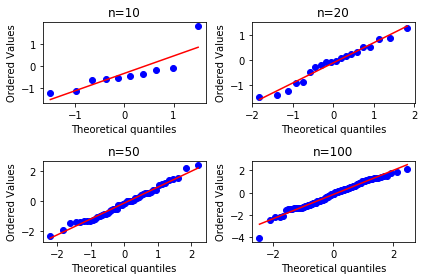

In [21]:
plt.subplot(2, 2, 1)
x = st.norm.rvs(size = 10)
st.probplot(x, plot = plt)
plt.title("n=10")
plt.subplot(2, 2, 2)
x = st.norm.rvs(size = 20)
st.probplot(x, plot = plt)
plt.title("n=20")
plt.subplot(2, 2, 3)
x = st.norm.rvs(size = 50)
st.probplot(x, plot = plt)
plt.title("n=50")
plt.subplot(2, 2, 4)
x = st.norm.rvs(size = 100)
st.probplot(x, plot = plt)
plt.title("n=100")
plt.tight_layout()
plt.show()


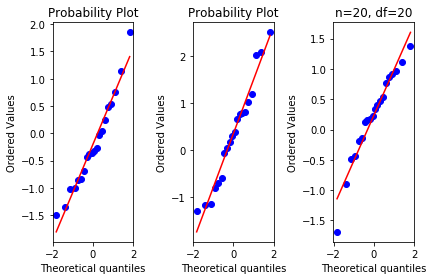

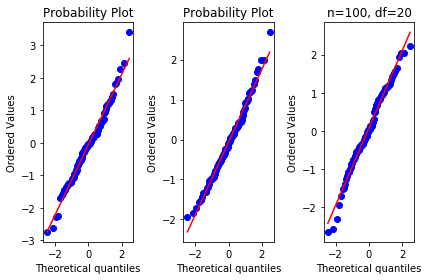

In [23]:
for i in range(1,4):
    plt.subplot(1,3,i)
    x = st.t.rvs(size=20, df=20)
    st.probplot(x,plot=plt)
plt.title("n=20, df=20")
plt.tight_layout()
plt.show()
for i in range(1,4):
    plt.subplot(1,3,i)
    x = st.t.rvs(size=100, df=20)
    st.probplot(x,plot=plt)
plt.title("n=100, df=20")
plt.tight_layout()
plt.show()


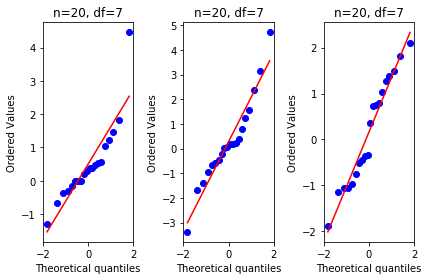

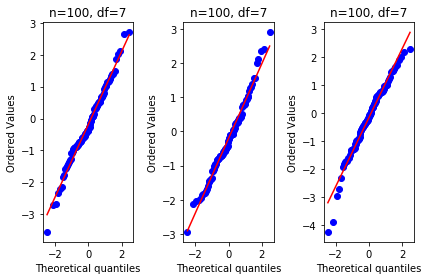

In [24]:
for i in range(1,4):
    plt.subplot(1,3,i)
    x = st.t.rvs(size=20, df=7)
    st.probplot(x,plot=plt)
    plt.title("n=20, df=7")
plt.tight_layout()
plt.show()
for i in range(1,4):
    plt.subplot(1,3,i)
    x = st.t.rvs(size=100, df=7)
    st.probplot(x,plot=plt)
    plt.title("n=100, df=7")
plt.tight_layout()
plt.show()


# 5.2

Text(0.5, 1.0, 'Mittelwerte von 5 Beobachtungen')

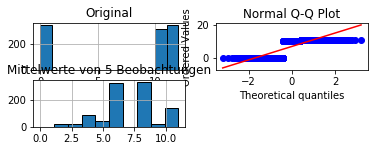

In [34]:
plt.tight_layout(False)
# moegliche Werte von X
werte = np.array([0,10,11])
# X simulieren
sim = Series(np.random.choice(werte, size=1000, replace=True))
# Mehrere Grafiken neben- und untereinander
plt.subplot(4,2,1)
# Histogramm erstellen
sim.hist(bins=[0,1,10,11,12], edgecolor="black")
plt.title("Original")
plt.subplot(4,2,2)
# Normalplot erstellen
st.probplot(sim,plot=plt)
plt.title("Normal Q-Q Plot")






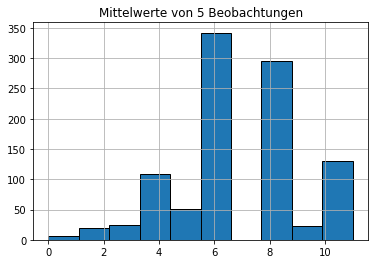

In [38]:
n = 5
# X_1,...,X_n simulieren und in einer n-spaltigen
# Matrix (mit 1000 Zeilen) anordnen
sim = np.random.choice(werte, size=n*1000, replace=True)
sim = DataFrame(np.reshape(sim,(n,1000)))
#In jeder Matrixzeile Mittelwert berechnen
sim_mean = sim.mean()
sim_mean.hist(edgecolor="black")
plt.title("Mittelwerte von 5 Beobachtungen")
plt.show()


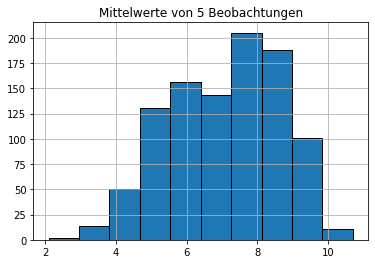

In [39]:
n = 10
# X_1,...,X_n simulieren und in einer n-spaltigen
# Matrix (mit 1000 Zeilen) anordnen
sim = np.random.choice(werte, size=n*1000, replace=True)
sim = DataFrame(np.reshape(sim,(n,1000)))
#In jeder Matrixzeile Mittelwert berechnen
sim_mean = sim.mean()
sim_mean.hist(edgecolor="black")
plt.title("Mittelwerte von 5 Beobachtungen")
plt.show()

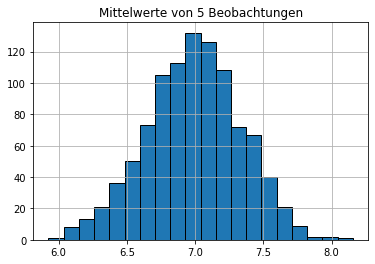

In [43]:
n = 200
# X_1,...,X_n simulieren und in einer n-spaltigen
# Matrix (mit 1000 Zeilen) anordnen
sim = np.random.choice(werte, size=n*1000, replace=True)
sim = DataFrame(np.reshape(sim,(n,1000)))
#In jeder Matrixzeile Mittelwert berechnen
sim_mean = sim.mean()
sim_mean.hist(edgecolor="black", bins=20)
plt.title("Mittelwerte von 5 Beobachtungen")
plt.show()

In [46]:
Series([1,10,11]).std()

5.507570547286102

In [47]:
Series(sim[0]).std()

4.917344444098822

# 5.3

In [69]:
iron = pd.read_csv("ironF3.dat",sep=" ",index_col=False)

In [70]:
iron.head()

,high,medium,low
0,0.71,2.20,2.25
1,1.66,2.93,3.93
2,2.01,3.08,5.08
3,2.16,3.49,5.82
4,2.42,4.11,5.84


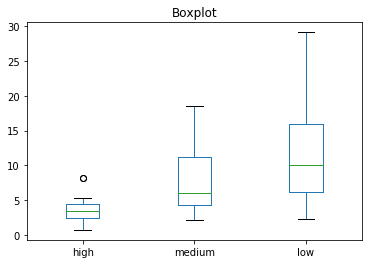

In [97]:
iron.plot(kind="box")
plt.title(f"Boxplot")
plt.show()

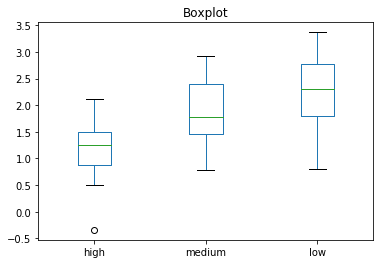

In [98]:
iron_log = np.log(iron)
iron_log.plot(kind="box")
plt.title(f"Boxplot")
plt.show()

((array([-1.77709673, -1.33087857, -1.05345661, -0.83977496, -0.6589352 ,
         -0.49749478, -0.34812942, -0.20618578, -0.06829777,  0.06829777,
          0.20618578,  0.34812942,  0.49749478,  0.6589352 ,  0.83977496,
          1.05345661,  1.33087857,  1.77709673]),
  array([0.78845736, 1.07500242, 1.1249296 , 1.24990174, 1.41342303,
         1.59938758, 1.64093658, 1.7119945 , 1.73695123, 1.83258146,
         1.98100147, 2.06686276, 2.18041746, 2.48156775, 2.74341734,
         2.76568998, 2.90690106, 2.9226238 ])),
 (0.6858048553747129, 1.901224840075921, 0.9844044280605407))

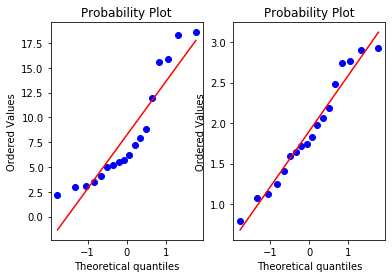

In [101]:
plt.subplot(121)
st.probplot(iron['medium'], plot=plt)
plt.subplot(122)
st.probplot(iron_log['medium'], plot=plt)

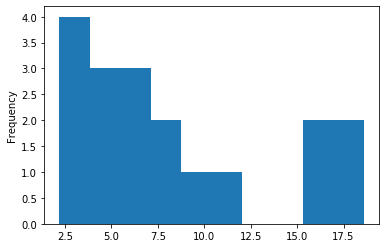

In [104]:
iron['medium'].plot(kind="hist")

In [111]:
iron['medium'].mean()

8.203888888888889

In [112]:
iron['medium'].std()

5.447385923421693

In [113]:
iron['medium'].var()

29.67401339869281

In [118]:
1-norm.cdf(x=10, loc=iron['medium'].mean(), scale=iron['medium'].std())

0.37080583780045573

In [120]:
iron_log['medium'].mean()

1.901224840075921

In [121]:
iron_log['medium'].std()

0.6585116257598326

In [123]:
iron_log['medium'].var()

0.43363756126085784

In [124]:
1-norm.cdf(x=np.log(10), loc=iron_log['medium'].mean(), scale=iron_log['medium'].std())

0.2710978359464026

In [144]:
1-expon.cdf(x=12, loc=0, scale=(8))

0.2231301601484298

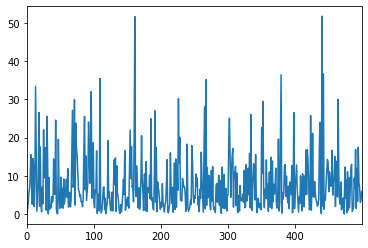

In [153]:
poisson.pmf(k=2, loc=0, mu=1.5)

0.25102143016698353

In [160]:
serieAbstaende = np.array([16.9 ,4.20 ,6.70,8.83 ,10.7 ,22.4 ,1.37 ,3.00 ,4.82 ,4.53 ,6.77 ,4.81])

In [162]:
sorted_values = np.sort(serieAbstaende)

In [179]:
y = expon.ppf(q=sorted_values, loc=0, scale=8)

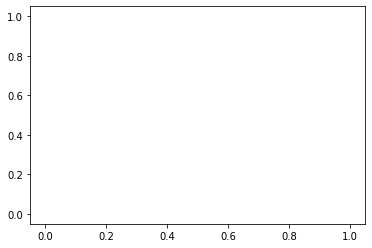

In [180]:
plt.plot(y, sorted_values)

Text(0, 0.5, 'Empirische Quantile')

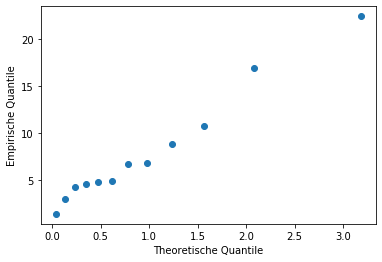

In [213]:
y = np.sort(np.array([16.9, 4.20, 6.70, 8.83, 10.7 ,22.4, 1.37,3.00, 4.82, 4.53, 6.77, 4.81]))
alphak = (np.arange(1,13)-0.5)/12
x = -np.log(1-alphak)
plt.plot(x,y,'o')
plt.xlabel("Theoretische Quantile")
plt.ylabel("Empirische Quantile")

In [214]:
print(x)
xn = x[:,np.newaxis]

[0.04255961 0.13353139 0.23361485 0.34484049 0.47000363 0.61310447
 0.78015856 0.98082925 1.23214368 1.56861592 2.07944154 3.17805383]


In [215]:
print(xn)

[[0.04255961]
 [0.13353139]
 [0.23361485]
 [0.34484049]
 [0.47000363]
 [0.61310447]
 [0.78015856]
 [0.98082925]
 [1.23214368]
 [1.56861592]
 [2.07944154]
 [3.17805383]]


In [220]:
a, _, _, _ = np.linalg.lstsq(xn,y,rcond=None)

In [221]:
print(a)

[7.42075136]


In [223]:
a, _, _, _ = np.linalg.lstsq(xn,y,rcond=None)

# 5.5

In [239]:
variables = (uniform.rvs(size=1000, loc=0, scale=1/2))
arr = -np.log(variables)/2

(array([545., 227., 133.,  46.,  27.,  13.,   5.,   3.,   0.,   1.]),
 array([0.34658817, 0.7216985 , 1.09680882, 1.47191914, 1.84702947,
        2.22213979, 2.59725011, 2.97236044, 3.34747076, 3.72258108,
        4.09769141]),
 <a list of 10 Patch objects>)

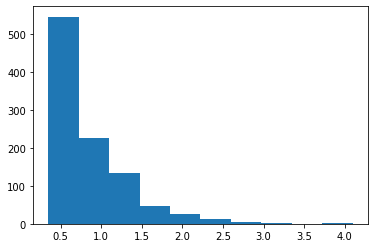

In [240]:
plt.hist(arr)

Text(0.5, 1.0, 'Histogram of y')

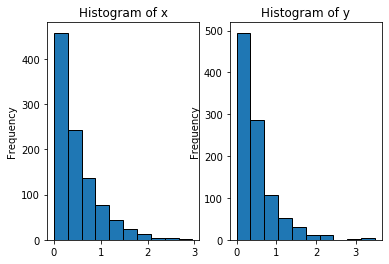

In [238]:
from scipy.stats import uniform, expon
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
v = uniform.rvs(size=1000, loc=0, scale=1)
x = Series(-np.log(v)/2)
plt.subplot(121)
x.plot(kind="hist", edgecolor="black")
plt.title("Histogram of x")
y = Series(expon.rvs(size=1000, scale=1/2))
plt.subplot(122)
y.plot(kind="hist", edgecolor="black")
plt.title("Histogram of y")

Text(0, 0.5, 'Empirische Quantile')

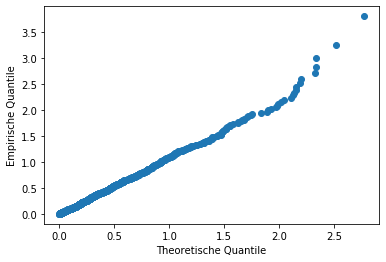

In [290]:
v = uniform.rvs(size=1000, loc=0, scale=1)
x = -np.log(v)/2
x = np.sort(x)
n = 1000
theor_quantilen = expon.ppf((np.linspace(1,n,n)-0.5)/n, scale=1/2)
y = theor_quantilen
plt.plot(x,y,"o")
plt.xlabel("Theoretische Quantile")
plt.ylabel("Empirische Quantile")

Text(0, 0.5, 'Empirische Quantile')

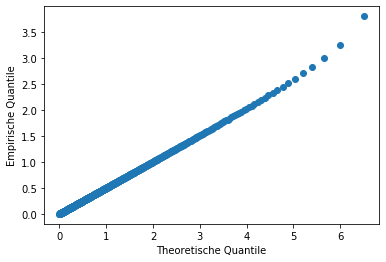